# Assignment 1: Pixel Regression.

Can we recover an image by learning a deep regression map from pixels to colors?: $f: (x,y) \to (r,g,b)$.

Our target image will be Mona Lisa:

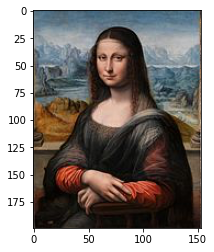

(199, 153, 4)

In [1]:
import matplotlib.image as mpimg
import matplotlib.pylab as plt
import numpy as np
%matplotlib inline

#downloading image - normalized
im = mpimg.imread("https://raw.githubusercontent.com/DataScienceUB/DeepLearningMaster2019/master/data/monalisa.png")

#displaying the image and it's shape
plt.imshow(im)
plt.show()
im.shape

Ourt training dataset will be composed of pixels locations and input and pixel values as output:

In [2]:
X_train = []
#our target - vectors with colours r, g and b.
Y_train = []

for i in range(im.shape[0]):
    for j in range(im.shape[1]):
        X_train.append([float(i),float(j)])
        Y_train.append(im[i][j][:3])
        
X_train = np.array(X_train)
Y_train = np.array(Y_train)

print('Samples:', X_train.shape[0])

#printing the pixel position and it's colour values
print('(x,y):', X_train[1230],'->', '(r,g,b):',Y_train[0])

#we would like the model to learn the colour of the pixel

Samples: 30447
(x,y): [8. 6.] -> (r,g,b): [0.33333334 0.40784314 0.4627451 ]


Our objective is to train a deep Multilayer Perceptron (MLP) that is able to generate an approximate image, at least as this one:

![alt text](https://github.com/DataScienceUB/DeepLearningMaster2019/blob/master/images/result.png?raw=1)


In [3]:
import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers import Dense, Activation

#model

n=1000 #number of neurons per layer
model = Sequential()
model.add(Dense(n, input_dim=2, activation='relu')) #input data has 2 dimentions

model.add(Dense(n, activation='relu'))
model.add(Dense(n, activation='relu'))
model.add(Dense(n, activation='relu'))
model.add(Dense(n, activation='relu'))
model.add(Dense(n, activation='relu'))
model.add(Dense(n, activation='relu'))    #activation funcion could be changed, relu is the one used the most often as it seems to perform well. 
model.add(Dense(n, activation='relu'))
model.add(Dense(n, activation='relu'))
model.add(Dense(n, activation='relu'))
model.add(Dense(n, activation='relu'))


model.add(Dense(3, activation='sigmoid')) #we want 3 dimentions for the output data


# Compiling the model
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])   

#normalizing 
Y_train_n = Y_train #already normalized
X_train_n = X_train/im.shape[:2]

Using TensorFlow backend.


In [4]:
Y_train_n

array([[0.33333334, 0.40784314, 0.4627451 ],
       [0.4117647 , 0.4862745 , 0.5411765 ],
       [0.37254903, 0.4627451 , 0.52156866],
       ...,
       [0.12941177, 0.08627451, 0.07843138],
       [0.09803922, 0.05490196, 0.04705882],
       [0.22745098, 0.18431373, 0.1764706 ]], dtype=float32)

Epoch 1/1000
30447/30447 [==============================] - 3s 92us/step - loss: 0.0370 - accuracy: 0.7661
Epoch 2/1000
30447/30447 [==============================] - 1s 30us/step - loss: 0.0320 - accuracy: 0.8283
Epoch 3/1000
30447/30447 [==============================] - 1s 31us/step - loss: 0.0284 - accuracy: 0.8346
Epoch 4/1000
30447/30447 [==============================] - 1s 31us/step - loss: 0.0247 - accuracy: 0.8018
Epoch 5/1000
30447/30447 [==============================] - 1s 30us/step - loss: 0.0205 - accuracy: 0.8003
Epoch 6/1000
30447/30447 [==============================] - 1s 32us/step - loss: 0.0181 - accuracy: 0.8108
Epoch 7/1000
30447/30447 [==============================] - 1s 31us/step - loss: 0.0147 - accuracy: 0.8748
Epoch 8/1000
30447/30447 [==============================] - 1s 31us/step - loss: 0.0128 - accuracy: 0.8816
Epoch 9/1000
30447/30447 [==============================] - 1s 31us/step - loss: 0.0113 - accuracy: 0.8875
Epoch 10/1000
30447/30447 [==========

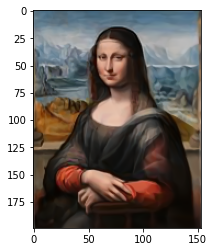

In [5]:
# use this cell to find the best model architecture


#higher the batch size faster the model trains 
history = model.fit(X_train_n, Y_train_n, epochs=1000, shuffle=True, verbose=1, batch_size=500)

Y = model.predict(X_train_n, batch_size=10000)

k = 0
im_out = im[:,:,:3] #removing the alpha value - opacity 
for i in range(im.shape[0]):
    for j in range(im.shape[1]):
        im_out[i,j]= Y[k]
        k += 1
        
plt.imshow(im_out)
plt.show()

#This model worked pretty well. I added a few simpler versions that I tried below. 
#For more complex models that this one, I'd expect even better result image. 

Epoch 1/1000
30447/30447 [==============================] - 0s 9us/step - loss: 0.0499 - accuracy: 0.6354
Epoch 2/1000
30447/30447 [==============================] - 0s 4us/step - loss: 0.0347 - accuracy: 0.7715
Epoch 3/1000
30447/30447 [==============================] - 0s 4us/step - loss: 0.0329 - accuracy: 0.8107
Epoch 4/1000
30447/30447 [==============================] - 0s 4us/step - loss: 0.0319 - accuracy: 0.8123
Epoch 5/1000
30447/30447 [==============================] - 0s 4us/step - loss: 0.0305 - accuracy: 0.8115
Epoch 6/1000
30447/30447 [==============================] - 0s 4us/step - loss: 0.0296 - accuracy: 0.8333
Epoch 7/1000
30447/30447 [==============================] - 0s 4us/step - loss: 0.0285 - accuracy: 0.8423
Epoch 8/1000
30447/30447 [==============================] - 0s 4us/step - loss: 0.0269 - accuracy: 0.8387
Epoch 9/1000
30447/30447 [==============================] - 0s 4us/step - loss: 0.0252 - accuracy: 0.8361
Epoch 10/1000
30447/30447 [===================

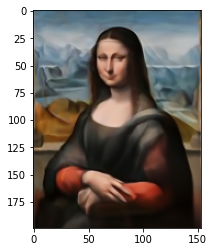

In [9]:
import tensorflow.keras as keras
from keras.models import Sequential

# your model here
# hints: k*10^2 neurons per layer + good initialization + deep network (>2 layers)

from keras.layers import Dense, Activation

#model

#number of neurons per layer
n=500
model = Sequential()

model.add(Dense(n, input_dim=2, activation='relu'))

model.add(Dense(n, activation='relu'))
model.add(Dense(n, activation='relu'))
model.add(Dense(n, activation='relu'))
model.add(Dense(n, activation='relu'))
model.add(Dense(n, activation='relu'))

model.add(Dense(3, activation='sigmoid'))


# Compile model
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

#normalizing 
Y_train_n = Y_train #stayes the same
X_train_n = X_train/im.shape[:2]

# use this cell to find the best model architecture

history2 = model.fit(X_train_n, Y_train_n, epochs=1000, shuffle=True, verbose=1, batch_size=2000)

Y = model.predict(X_train_n, batch_size=10000)

k = 0
im_out = im[:,:,:3]
for i in range(im.shape[0]):
    for j in range(im.shape[1]):
        im_out[i,j]= Y[k]
        k += 1
        
plt.imshow(im_out)
plt.show()

In [10]:
import tensorflow.keras as keras
from keras.models import Sequential

# your model here
# hints: k*10^2 neurons per layer + good initialization + deep network (>2 layers)

from keras.layers import Dense, Activation

#model

#number of neurons per layer
n=600
model = Sequential()

model.add(Dense(n, input_dim=2, activation='relu'))

model.add(Dense(n, activation='relu'))
model.add(Dense(n, activation='relu'))
model.add(Dense(n, activation='relu'))

model.add(Dense(3, activation='sigmoid'))


# Compile model
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

#normalizing 
Y_train_n = Y_train #stayes the same
X_train_n = X_train/im.shape[:2]

Epoch 1/1500
30447/30447 [==============================] - 0s 7us/step - loss: 0.0477 - accuracy: 0.5624
Epoch 2/1500
30447/30447 [==============================] - 0s 4us/step - loss: 0.0343 - accuracy: 0.7809
Epoch 3/1500
30447/30447 [==============================] - 0s 4us/step - loss: 0.0326 - accuracy: 0.7999
Epoch 4/1500
30447/30447 [==============================] - 0s 4us/step - loss: 0.0317 - accuracy: 0.8105
Epoch 5/1500
30447/30447 [==============================] - 0s 4us/step - loss: 0.0304 - accuracy: 0.8244
Epoch 6/1500
30447/30447 [==============================] - 0s 4us/step - loss: 0.0293 - accuracy: 0.8287
Epoch 7/1500
30447/30447 [==============================] - 0s 4us/step - loss: 0.0283 - accuracy: 0.8257
Epoch 8/1500
30447/30447 [==============================] - 0s 4us/step - loss: 0.0273 - accuracy: 0.8221
Epoch 9/1500
30447/30447 [==============================] - 0s 4us/step - loss: 0.0262 - accuracy: 0.8258
Epoch 10/1500
30447/30447 [===================

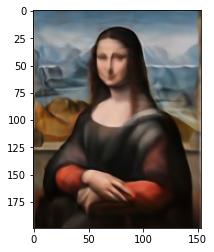

In [11]:
# use this cell to find the best model architecture

history3 = model.fit(X_train_n, Y_train_n, epochs=1500, shuffle=True, verbose=1, batch_size=2000)

Y = model.predict(X_train_n, batch_size=10000)

k = 0
im_out = im[:,:,:3]
for i in range(im.shape[0]):
    for j in range(im.shape[1]):
        im_out[i,j]= Y[k]
        k += 1
        
plt.imshow(im_out)
plt.show()

Epoch 1/1000
30447/30447 [==============================] - 0s 11us/step - loss: 0.0859 - accuracy: 0.6650
Epoch 2/1000
30447/30447 [==============================] - 0s 3us/step - loss: 0.0531 - accuracy: 0.6650
Epoch 3/1000
30447/30447 [==============================] - 0s 3us/step - loss: 0.0419 - accuracy: 0.6650
Epoch 4/1000
30447/30447 [==============================] - 0s 3us/step - loss: 0.0400 - accuracy: 0.6650
Epoch 5/1000
30447/30447 [==============================] - 0s 3us/step - loss: 0.0379 - accuracy: 0.6650
Epoch 6/1000
30447/30447 [==============================] - 0s 3us/step - loss: 0.0362 - accuracy: 0.6650
Epoch 7/1000
30447/30447 [==============================] - 0s 3us/step - loss: 0.0345 - accuracy: 0.6739
Epoch 8/1000
30447/30447 [==============================] - 0s 3us/step - loss: 0.0338 - accuracy: 0.7818
Epoch 9/1000
30447/30447 [==============================] - 0s 3us/step - loss: 0.0333 - accuracy: 0.7931
Epoch 10/1000
30447/30447 [==================

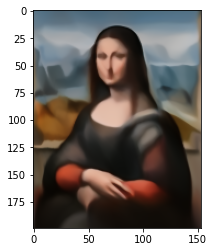

In [12]:
import tensorflow.keras as keras
from keras.models import Sequential

# your model here
# hints: k*10^2 neurons per layer + good initialization + deep network (>2 layers)

from keras.layers import Dense, Activation

#model

#number of neurons per layer
n=300
model = Sequential()

model.add(Dense(n, input_dim=2, activation='relu'))

model.add(Dense(n, activation='relu'))
model.add(Dense(n, activation='relu'))
model.add(Dense(n, activation='relu'))
model.add(Dense(n, activation='relu'))
model.add(Dense(n, activation='relu'))
model.add(Dense(n, activation='relu'))
model.add(Dense(n, activation='relu'))
model.add(Dense(n, activation='relu'))
model.add(Dense(n, activation='relu'))
model.add(Dense(n, activation='relu'))

model.add(Dense(3, activation='sigmoid'))


# Compile model
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

#normalizing 
Y_train_n = Y_train #stayes the same
X_train_n = X_train/im.shape[:2]

# use this cell to find the best model architecture

history4 = model.fit(X_train_n, Y_train_n, epochs=1000, shuffle=True, verbose=1, batch_size=10000)

Y = model.predict(X_train_n, batch_size=10000)

k = 0
im_out = im[:,:,:3]
for i in range(im.shape[0]):
    for j in range(im.shape[1]):
        im_out[i,j]= Y[k]
        k += 1
        
plt.imshow(im_out)
plt.show()

As we can see different number of layers, neurons and batch size change the results. For more complex problems comparison between the models would provide us with the information needed in order to choose the most optimal one. 